### 🚀 1. 구글 드라이브 마운트 및 라이브러리 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.7 MB/s eta 0:00:00


### 💻 2. 환경 확인 및 라이브러리 로드

In [ ]:
import os
import shutil
import torch
from ultralytics import YOLO
from IPython.display import Image, display

is_cuda = torch.cuda.is_available()
device = 0 if is_cuda else 'cpu'
print(f"🚀 GPU 사용 가능 여부: {is_cuda}")
print(f"⚙️ 현재 학습 디바이스: {device}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🚀 GPU 사용 가능 여부: True
⚙️ 현재 학습 디바이스: 0


### 📂 3. 데이터셋 경로 설정 및 YAML 파일 생성

In [ ]:
# 코랩 환경에 맞춰 구글 드라이브 내 데이터셋 경로 설정
data_dir = '/content/drive/MyDrive/ssy_ws/my_data/'

yaml_content = f"""
path: {data_dir}
train: train/images
val: valid/images
test: test/images

names:
  0: object
"""

with open('local_data.yaml', 'w') as f:
    f.write(yaml_content)
print("📝 local_data.yaml 생성 완료")

📝 local_data.yaml 생성 완료


### 🤖 4. YOLOv8n 모델 로드 및 구조 확인

In [ ]:
model = YOLO('yolov8n.pt')
print("✅ 모델 기본 클래스:")
print(model.names)

✅ 모델 기본 클래스:
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone'

### 🚀 5. 모델 학습 수행

In [ ]:
model.train(
    data='local_data.yaml',
    epochs=100,
    imgsz=320,
    patience=20,
    batch=20,
    device=device,
    mosaic=1.0,
    mixup=0.2
)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=local_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pret

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f45e5b94d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### 📍 6. 학습 결과 저장 경로 및 지표 확인

📍 학습 결과 저장 경로: runs/detect/train/
📊 성능 지표 추이 (results.png):


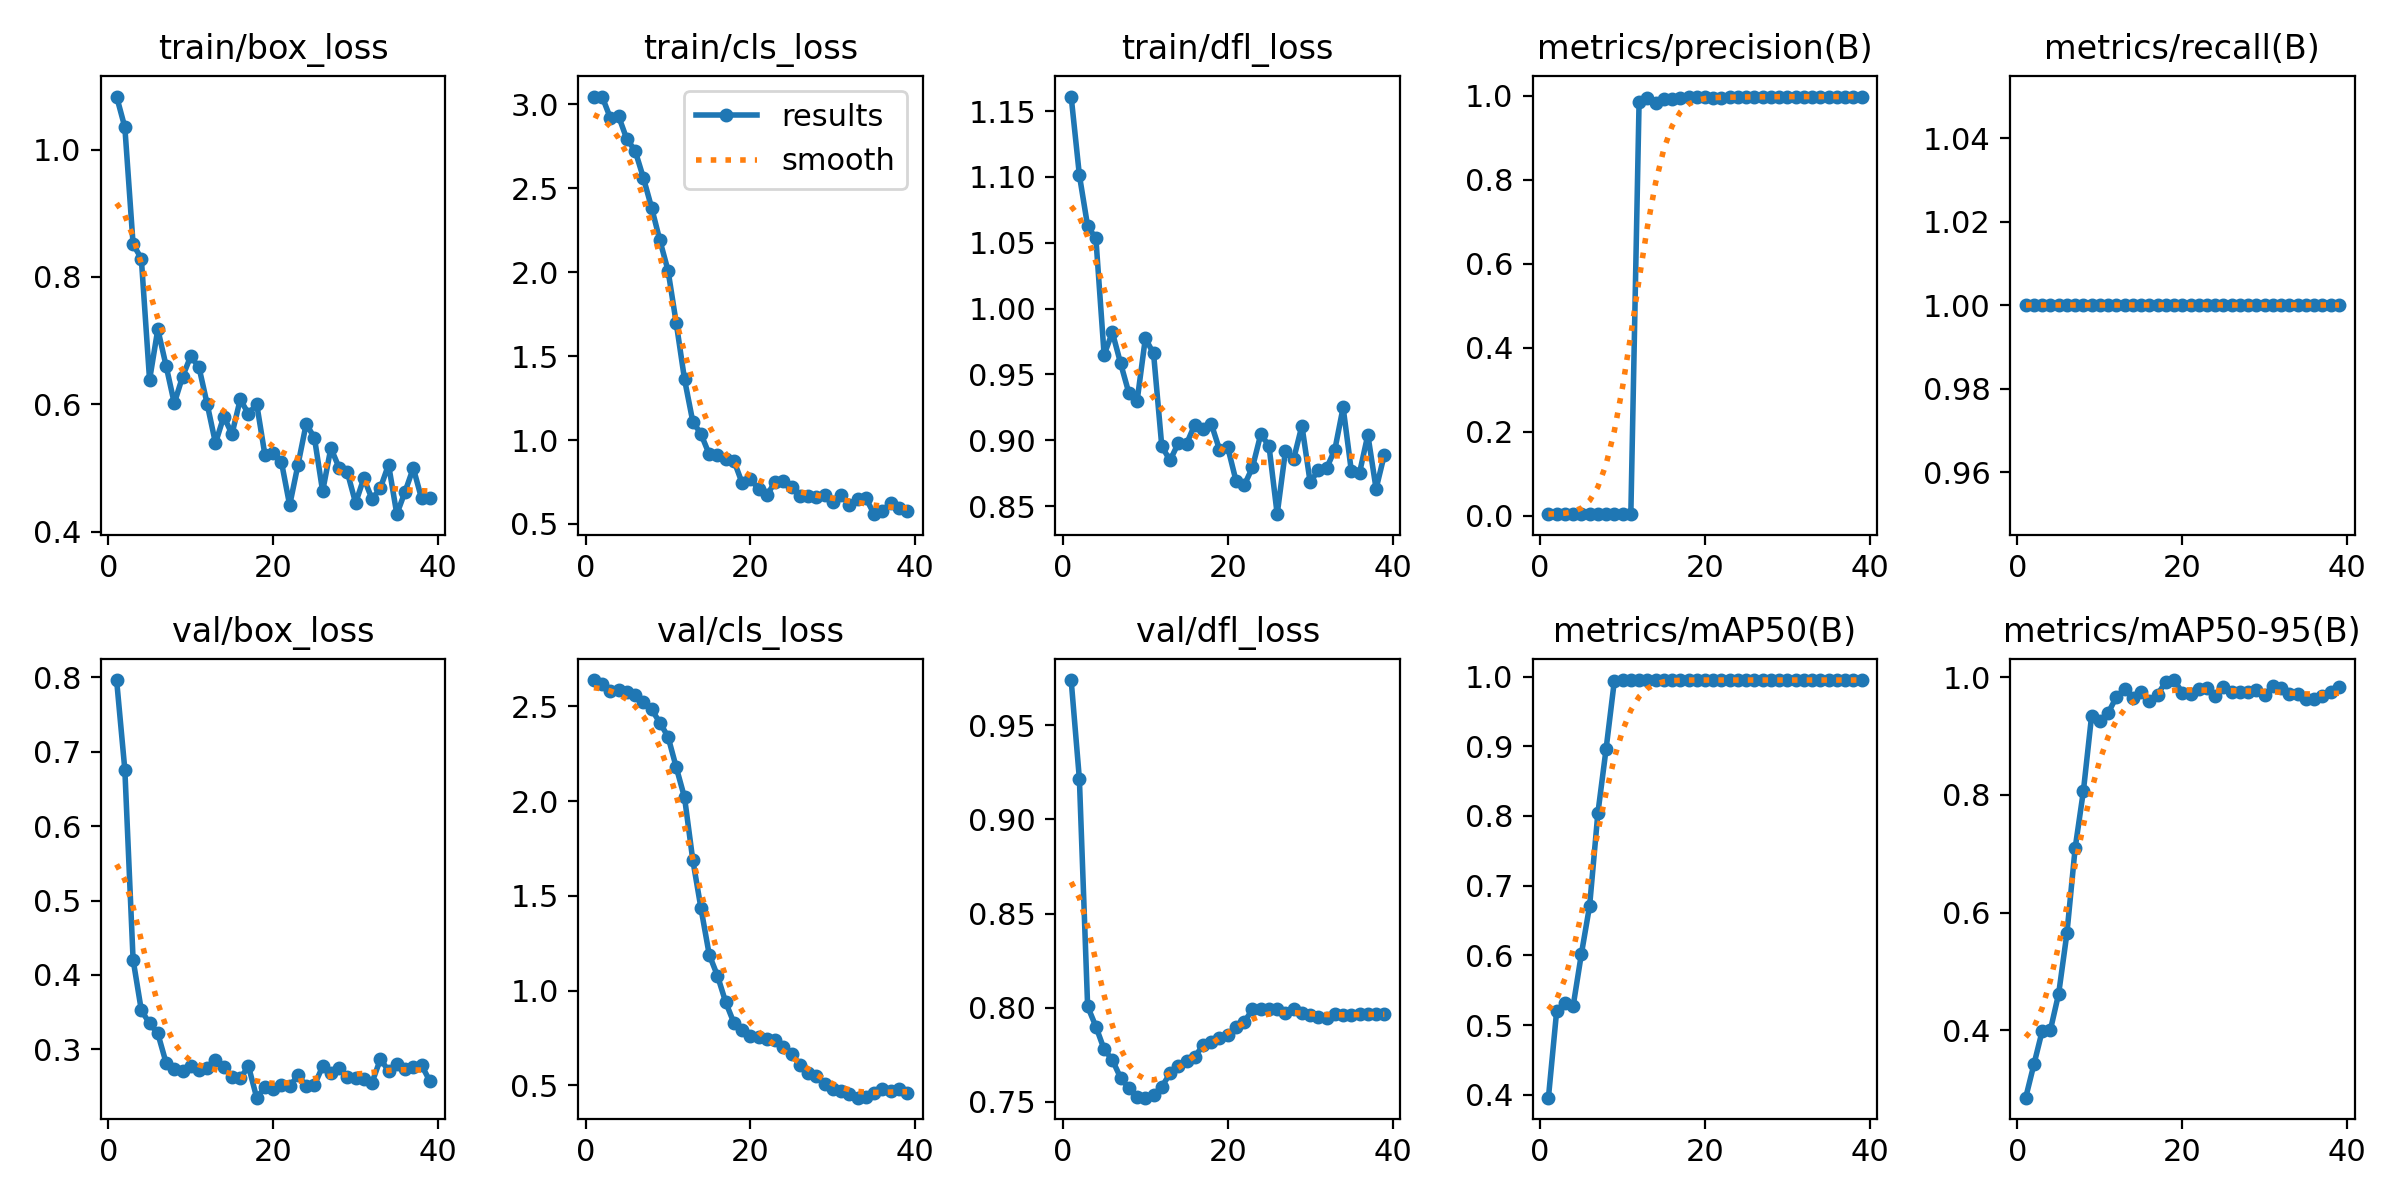

In [ ]:
print("📍 학습 결과 저장 경로: runs/detect/train/")

print("📊 성능 지표 추이 (results.png):")
display(Image(filename='runs/detect/train/results.png'))

### 🖼️ 7. 배치 데이터 시각화 확인

1️⃣ 학습 데이터 첫 번째 배치:


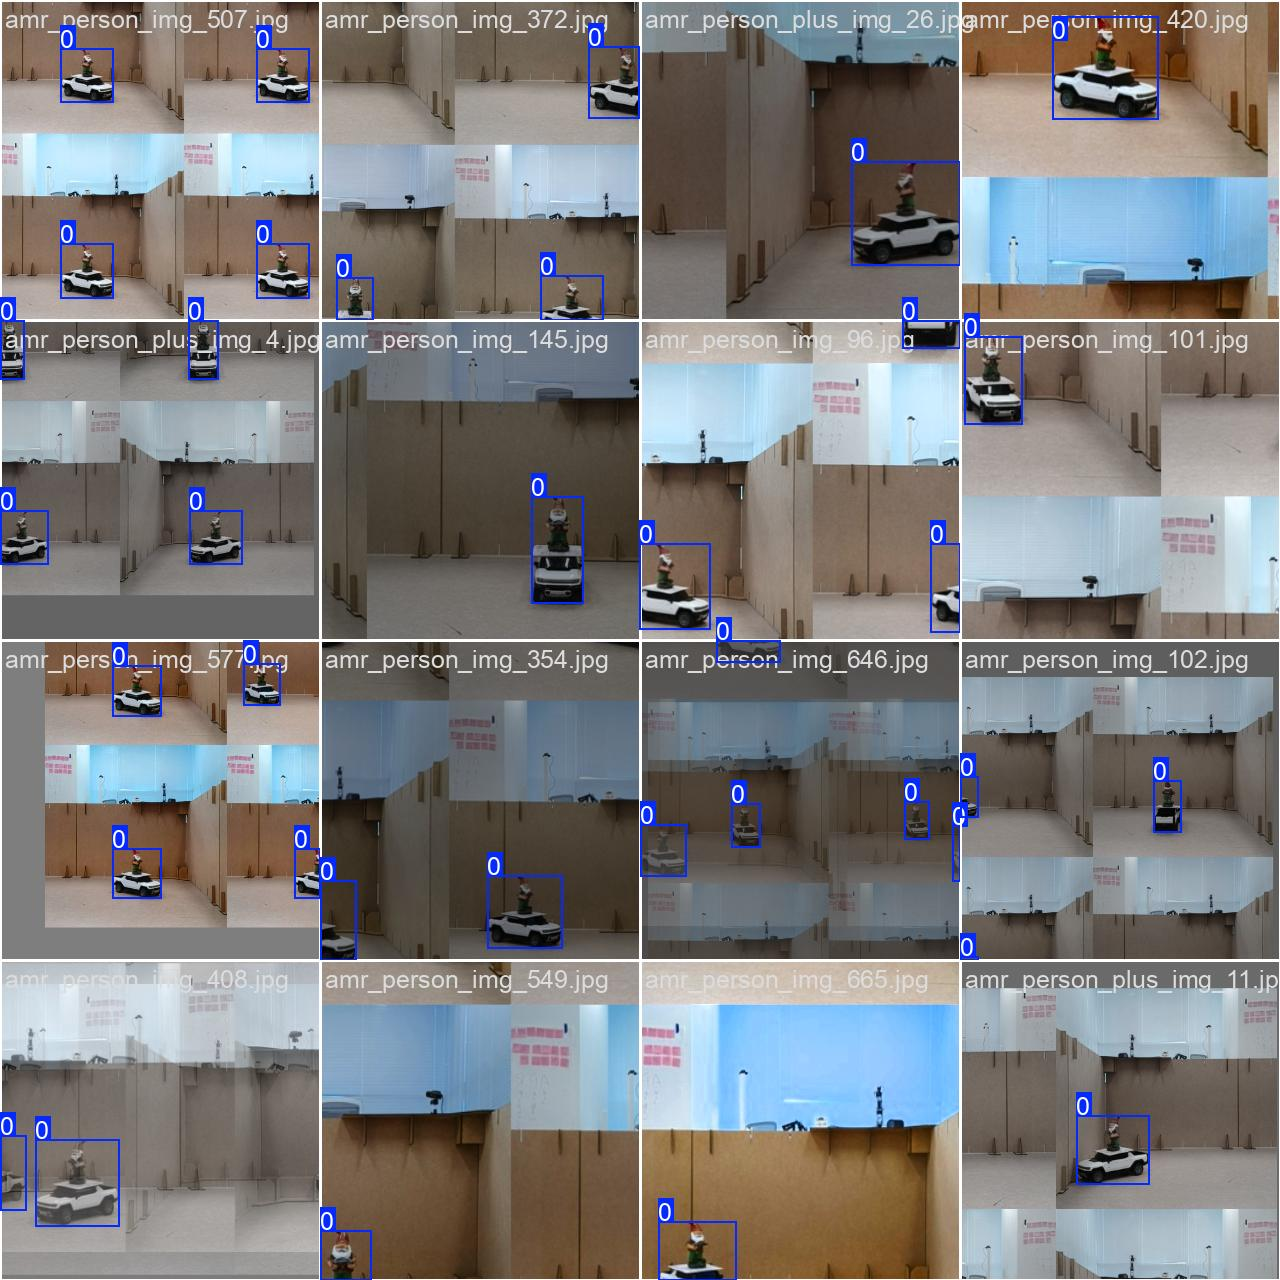

2️⃣ 검증 데이터 실제 라벨:


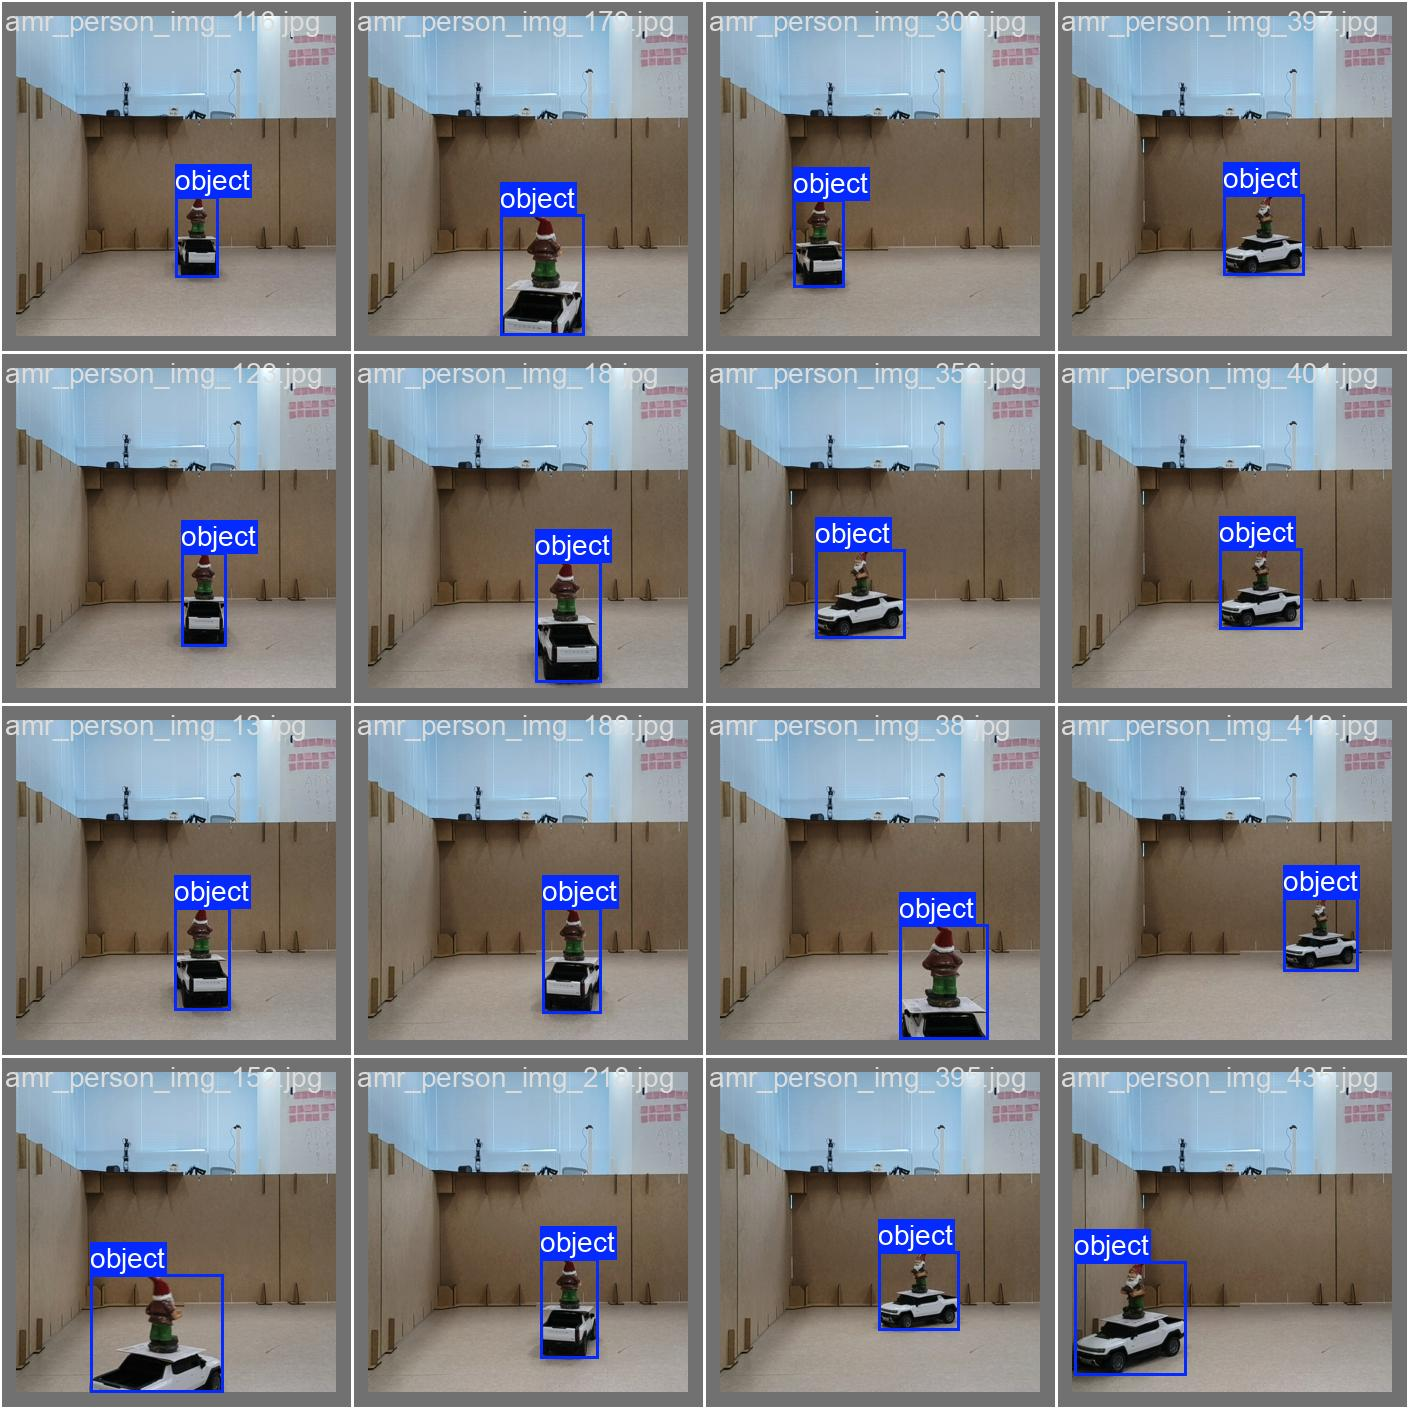

3️⃣ 검증 데이터 모델 예측:


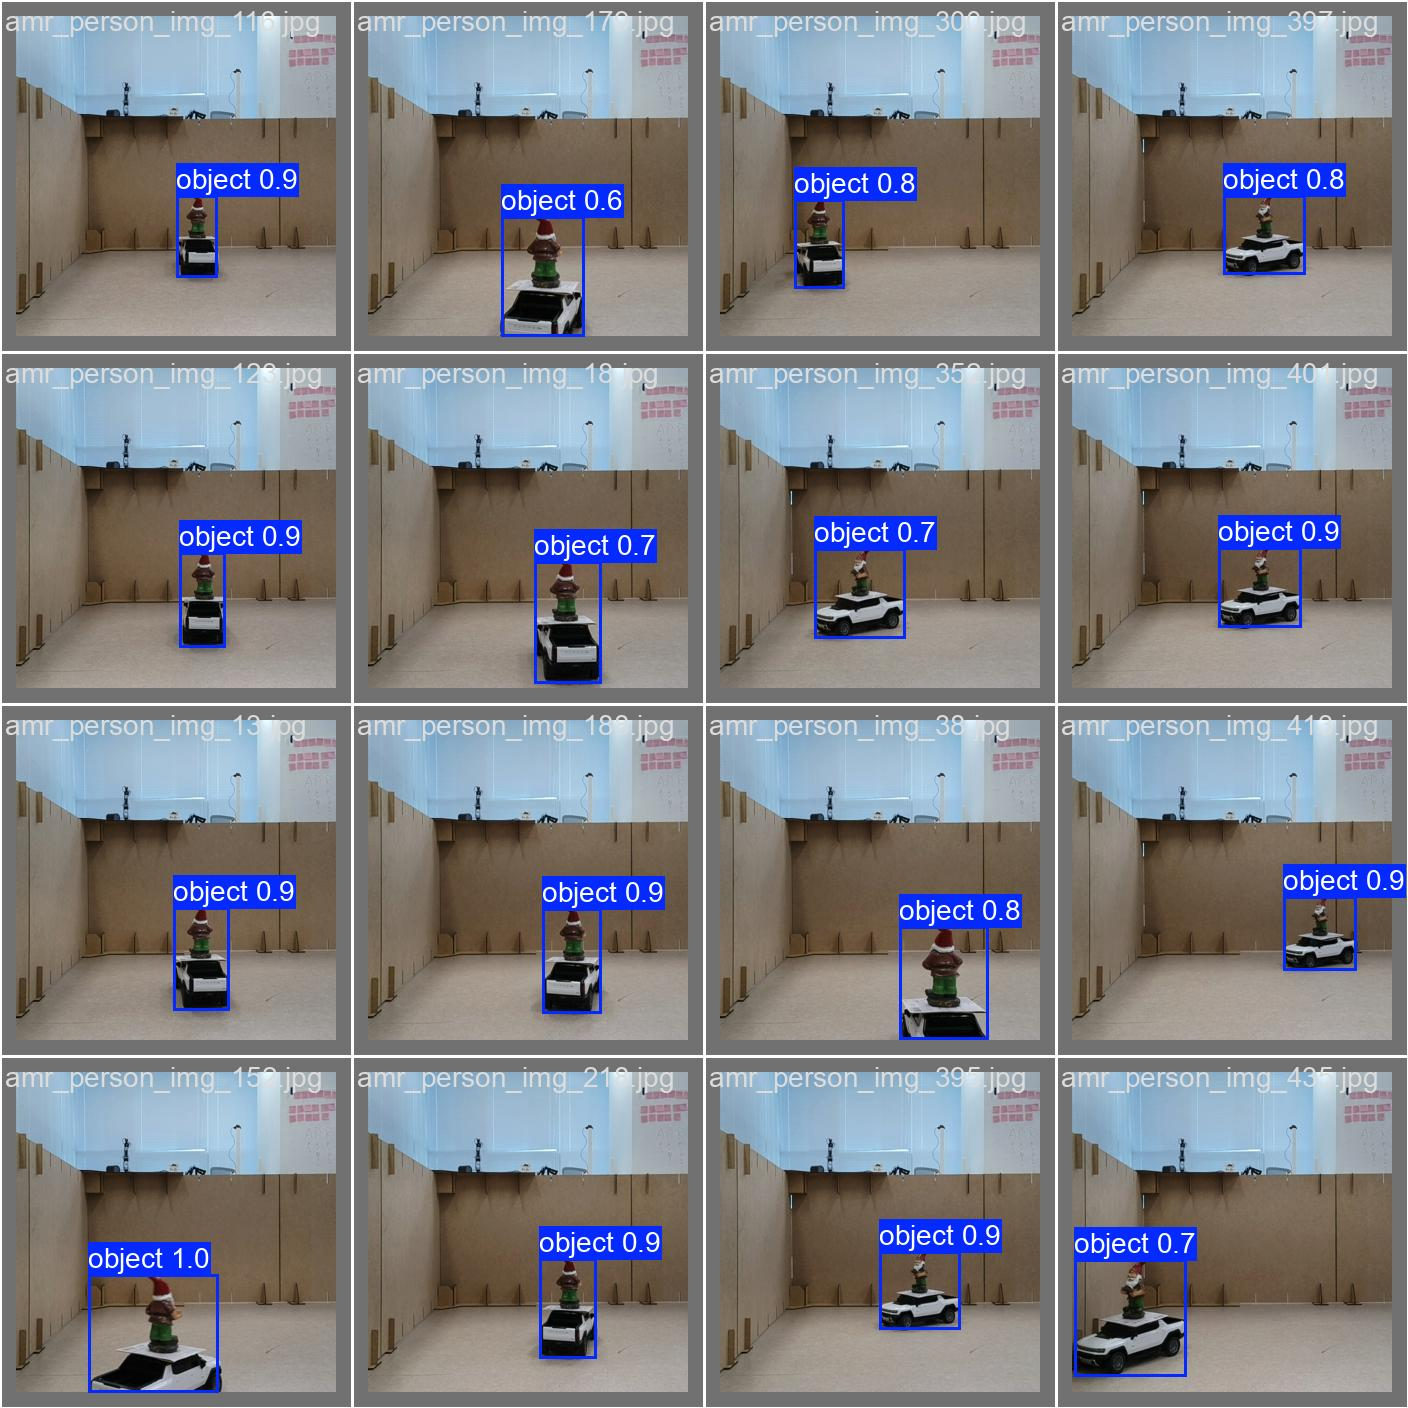

In [ ]:
print("1️⃣ 학습 데이터 첫 번째 배치:")
display(Image(filename='runs/detect/train/train_batch0.jpg'))

print("2️⃣ 검증 데이터 실제 라벨:")
display(Image(filename='runs/detect/train/val_batch0_labels.jpg'))

print("3️⃣ 검증 데이터 모델 예측:")
display(Image(filename='runs/detect/train/val_batch0_pred.jpg'))

### 🔍 8. 테스트 데이터셋 평가

✅ 로드된 모델 클래스: {0: 'object'}

image 1/1 /content/drive/MyDrive/ssy_ws/my_data/test/images/amr_person_img_245.jpg: 320x320 1 object, 37.3ms
Speed: 1.2ms preprocess, 37.3ms inference, 5.8ms postprocess per image at shape (1, 3, 320, 320)
Results saved to /content/runs/detect/runs/detect/test_results


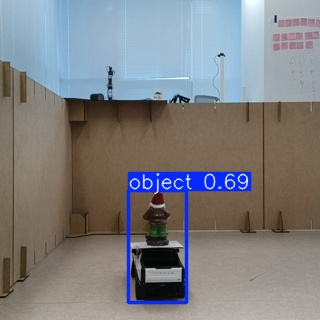

In [ ]:
test_model = YOLO('/content/runs/detect/train/weights/best.pt')
print(f"✅ 로드된 모델 클래스: {test_model.names}")

test_img_dir = os.path.join(data_dir, 'test/images')
if os.path.exists(test_img_dir) and os.listdir(test_img_dir):
    sample_img = os.path.join(test_img_dir, os.listdir(test_img_dir)[0])
    results = test_model.predict(source=sample_img, save=True, project='runs/detect', name='test_results', exist_ok=True)

    res_img_path = "/content/runs/detect/runs/detect/test_results/amr_person_img_245.jpg"
    display(Image(filename=res_img_path))
else:
    print("❌ 테스트 이미지를 찾을 수 없습니다.")

### 📊 10. 모델 성능 지표 확인

In [ ]:
model_path = '/content/runs/detect/train/weights/best.pt'
metrics_model = YOLO(model_path)

metrics = metrics_model.val()

print(f"Precision: {metrics.box.p.item():.4f}")
print(f"Recall: {metrics.box.r.item():.4f}")
print(f"mAP50: {metrics.box.map50.item():.4f}")
print(f"mAP50-95: {metrics.box.map.item():.4f}")

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 17.8±4.3 MB/s, size: 26.5 KB)
val: Scanning /content/drive/MyDrive/ssy_ws/my_data/valid/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 26/26 7.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.1it/s 0.7s
                   all         26         26      0.997          1      0.995      0.992
Speed: 1.8ms preprocess, 3.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val2
Precision: 0.9969
Recall: 1.0000
mAP50: 0.9950
mAP50-95: 0.9920


### 💾 9. 학습 완료 모델 구글 드라이브 복사

In [38]:
v_num = "1"  # 학습 버전 번호 직접 입력
target_dir = '/content/drive/MyDrive/ssy_ws/trained_pt'
os.makedirs(target_dir, exist_ok=True)

src_pt = 'runs/detect/train/weights/best.pt'
dst_pt = f"{target_dir}/trained_pt_v{v_num}.pt"

shutil.copy(src_pt, dst_pt)
print(f"🎉 모델 저장 완료: {dst_pt}")

🎉 모델 저장 완료: /content/drive/MyDrive/ssy_ws/trained_pt/trained_pt_v1.pt
